## Загрузка библиотек

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [316]:
def read_covid_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    X = df
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    # удаляем enrollee_id, этот параметр не является частью статистики и не нужен для анализа, т.к. там просто уникальные id
    X = df.drop(['enrollee_id', 'target'], axis=1)
    y = df.target
    return X, y

In [317]:
COVID_DATA_PATH = 'hw1_data/covid.csv'
HR_DATA_PATH = 'hw1_data/hr.csv'

In [318]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [319]:
X_hr.dtypes

city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

распределение числовых признаков, а также выведем количество NaN для каждого числового признака

In [320]:
def hist_number(df):
    for col in df.select_dtypes(include='number'):
        print(col)
        print(f'NaN number {df[col].isna().sum()}')
        sns.histplot(df[col])
        plt.show()

city_development_index
NaN number 0


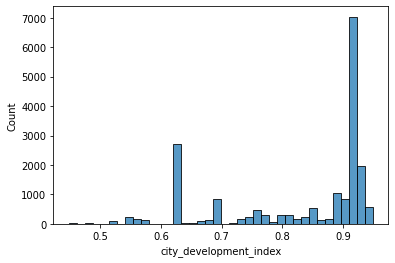

training_hours
NaN number 0


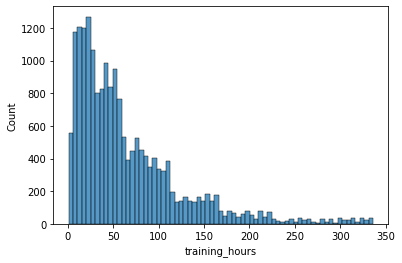

In [321]:
hist_number(X_hr)

статистика по количеству категориальных признаков

In [322]:
def bar_categorical(df):
    for col in df.select_dtypes(exclude='number'):
        print(col)
        print(f'NaN number {df[col].isna().sum()}')
        df[col].value_counts(dropna=False).plot.bar()
        plt.show()

city
NaN number 0


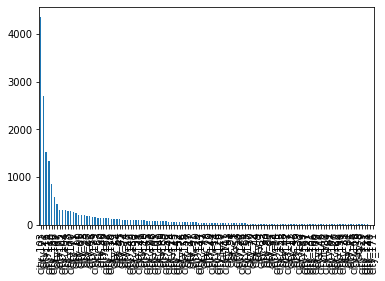

gender
NaN number 4508


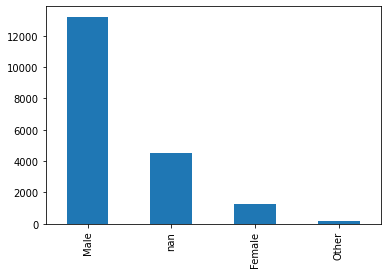

relevent_experience
NaN number 0


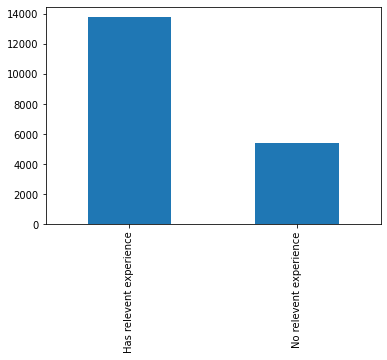

enrolled_university
NaN number 386


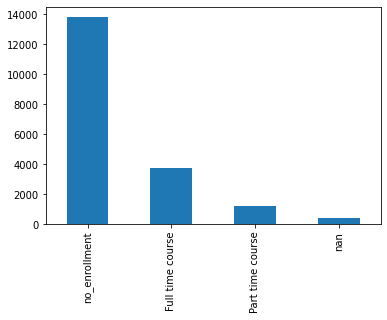

education_level
NaN number 460


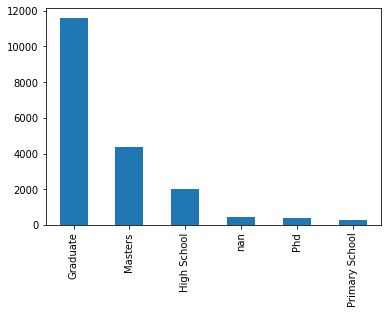

major_discipline
NaN number 2813


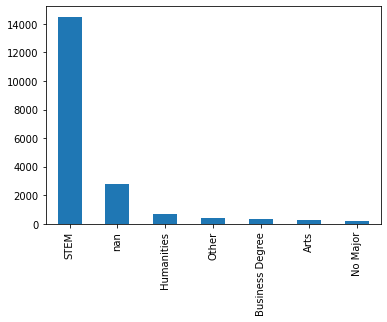

experience
NaN number 65


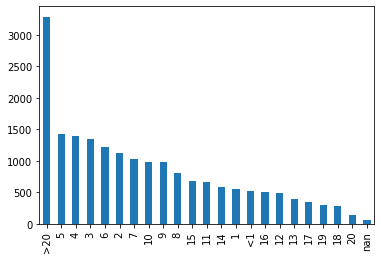

company_size
NaN number 5938


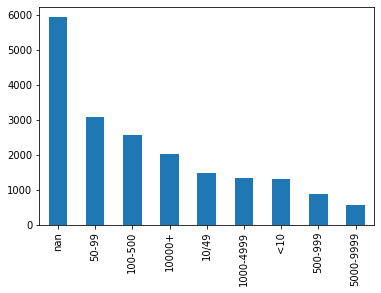

company_type
NaN number 6140


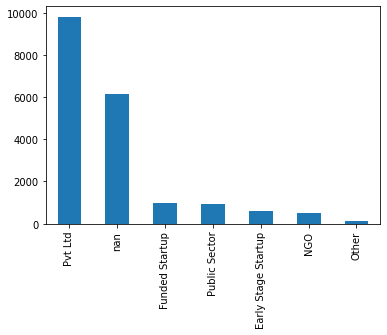

last_new_job
NaN number 423


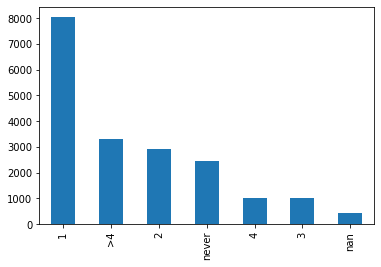

In [323]:
bar_categorical(X_hr)

также проверим нет ли na в таргете

<AxesSubplot:>

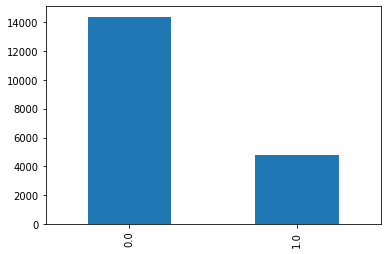

In [324]:
y_hr.value_counts(dropna=False).plot.bar()

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [325]:
print(f'Исходный размер датасета hr {X_hr.shape}')

Исходный размер датасета hr (19158, 12)


In [326]:
X_hr_dropna = X_hr.dropna()

In [327]:
print(f'Pазмер датасета covid без NaN {X_hr_dropna.shape}')

Pазмер датасета covid без NaN (8955, 12)


датасет уменьшился более чем в 2 раза

новое распределение числовых признаков

city_development_index
NaN number 0


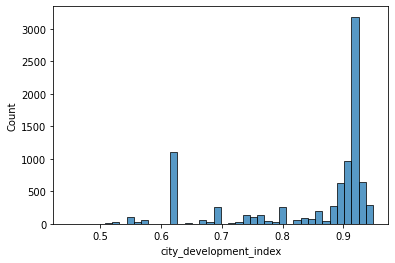

training_hours
NaN number 0


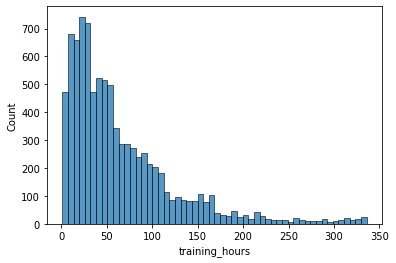

In [328]:
hist_number(X_hr_dropna)

вид распределений визуально не поменялся

новая статистика по количеству категориальных признаков

city
NaN number 0


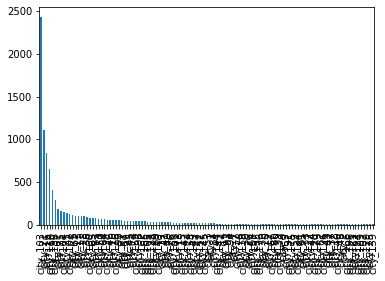

gender
NaN number 0


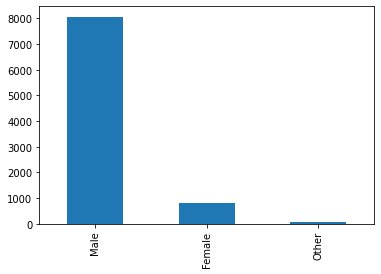

relevent_experience
NaN number 0


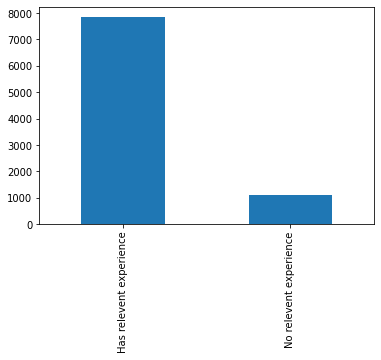

enrolled_university
NaN number 0


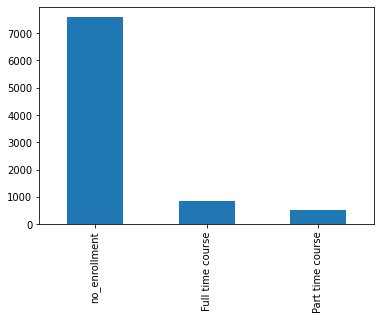

education_level
NaN number 0


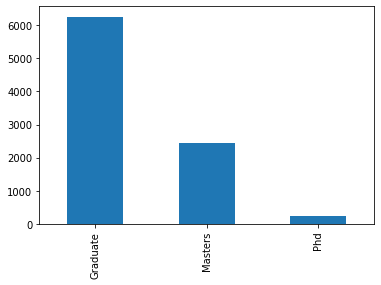

major_discipline
NaN number 0


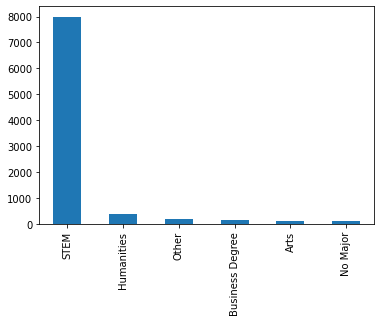

experience
NaN number 0


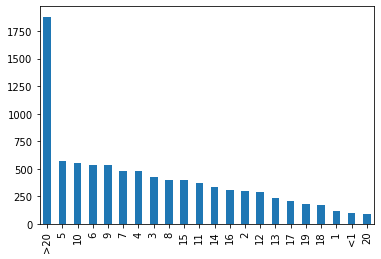

company_size
NaN number 0


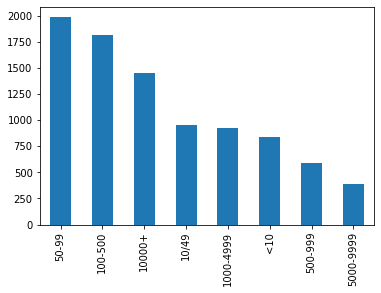

company_type
NaN number 0


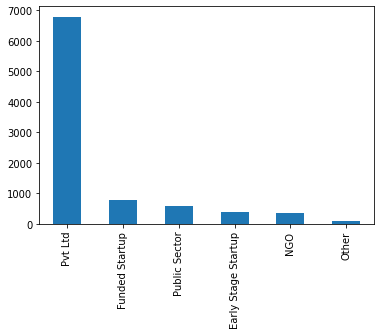

last_new_job
NaN number 0


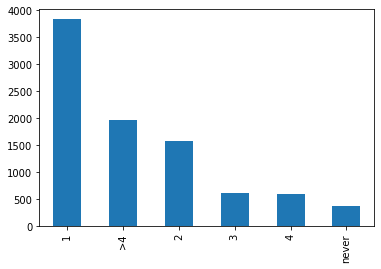

In [329]:
bar_categorical(X_hr_dropna)

для некоторых категориальных признаков изменилось количественное отношение друг к другу (например enrolled_university)

ннекоторые категории в признаке education_level полностью пропали

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

числовые признаки заменять не надо, т.к. там нет NaN (но если бы надо было заменять, заменял бы медианой, т.к. распределение имеет несимметричные хвосты и к таким выбросам среднее неустойчиво)

для категориальных переменных будем действовать так (для тех в которых есть NaN):

gender, NaN number 4508, получается вторая по количеству категория, заполнять значения самой встречающейся категорией сильно изменит распределение, создаем отдельную категорию

enrolled_university, NaN number 386, мало самая маленькая категория, заполним самой часто встречающейся

education_level, NaN number 460, мало, маленькая категория, заполним самой часто встречающейся

major_discipline, NaN number 2813, много значений, создаем отдельную категорию

experience, NaN number 65, мало, заполним самой часто встречающейся

company_size, NaN number 5938, самая большая категория, создаем отдельную категорию

company_type, NaN number 6140, вторая по величине категория, создаем отдельную категорию

last_new_job, NaN number 423, мало, заполним самой часто встречающейся

в целом я бы во всех признаках создал бы отдельную категорию для NaN, чтобы не портить точно известные данные (в дальнейшем при построении модели может незначительно повлиять), но по заданию действуем так

In [330]:
def fill_na(X, y):
    
    X_fill = X.copy()
    y_fill = y.copy()
    
    new_cat = ['gender', 'major_discipline', 'company_size', 'company_type']
    
    freq_cat = ['enrolled_university', 'education_level', 'experience', 'last_new_job']
    
    X_fill[new_cat] = X_fill[new_cat].fillna('unknown')
    
    for c in freq_cat:
        X_fill[c] = X_fill[c].fillna(X_fill[c].mode()[0])
    
    return X_fill, y_fill

In [331]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

In [332]:
X_hr_fill.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

city_development_index
NaN number 0


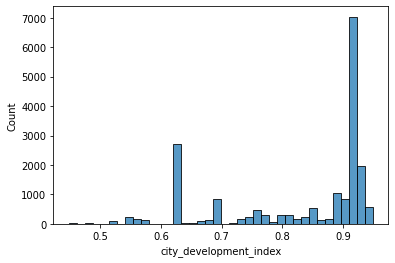

training_hours
NaN number 0


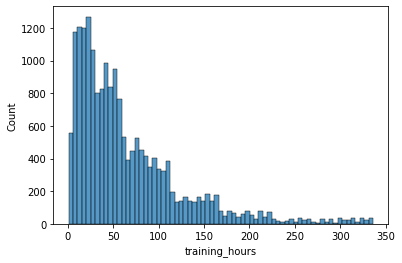

In [333]:
hist_number(X_hr_fill)

city
NaN number 0


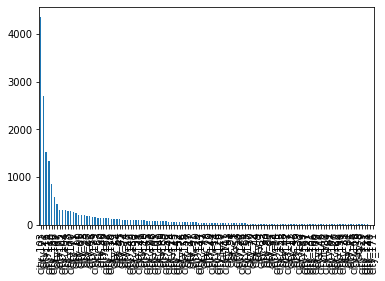

gender
NaN number 0


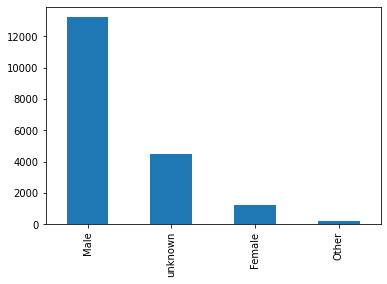

relevent_experience
NaN number 0


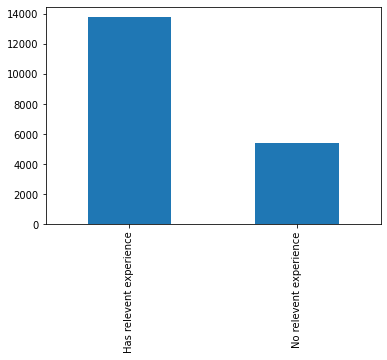

enrolled_university
NaN number 0


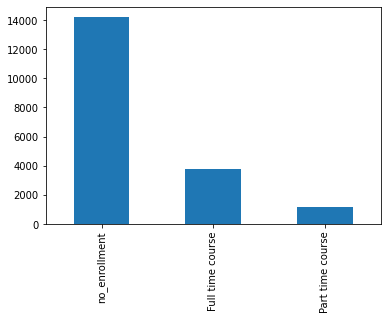

education_level
NaN number 0


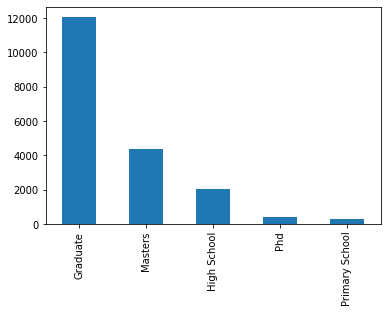

major_discipline
NaN number 0


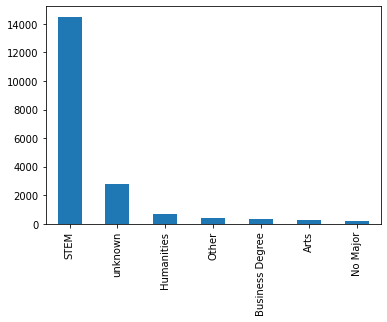

experience
NaN number 0


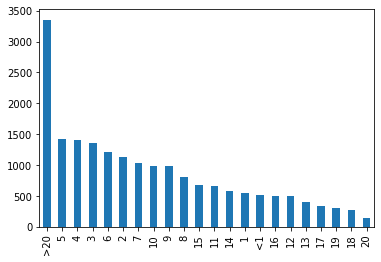

company_size
NaN number 0


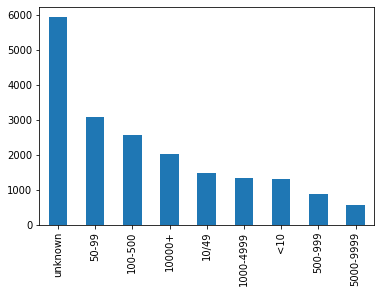

company_type
NaN number 0


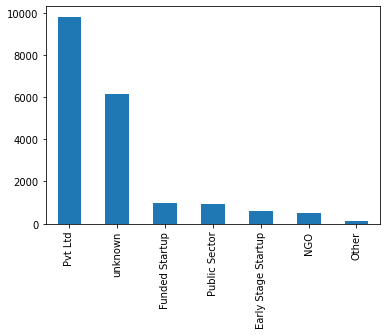

last_new_job
NaN number 0


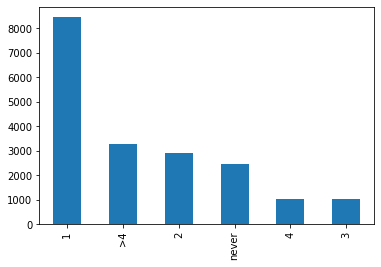

In [334]:
bar_categorical(X_hr_fill)

распределение числовых признаков не изменилось, тк там не было NaN, а строки полностью мы не удаляли

там где создали новую категорию, появилась новая категория

там где присвоили NaN значения самой частой категории, количество самой частой категории стало чуть больше

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [335]:
X_covid.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [336]:
X_covid_g = X_covid.groupby(['country']).count()
country_46 = X_covid_g[X_covid_g.date == 46].index[0]
country_46

'Bahrain'

специально заполняем NaN нулями, чтобы увидеть где они

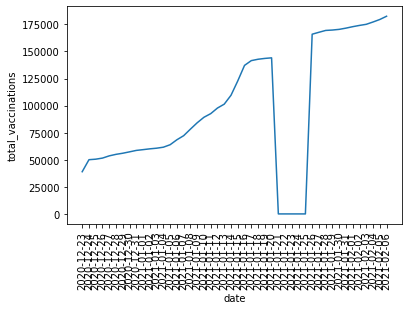

In [337]:
X_covid_b = X_covid[X_covid.country == country_46].sort_values('date')
sns.lineplot(x=X_covid_b.date, y=X_covid_b.total_vaccinations.fillna(0))
plt.xticks(rotation=90)
plt.show()

для заполнения NaN используем линейную интерполяцию, делаем это тк у нас тайм сериас данные и можно предположить что в пропущенные дни был рост вакцинаций
делаем линейную интерполяцию как простой пример, наверное есть лучше методы как можно предсказать временной ряд в пропущенный период

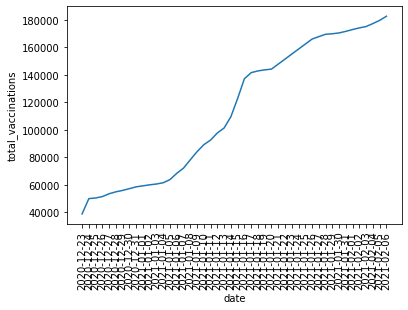

In [338]:
X_covid_b.total_vaccinations = X_covid_b.total_vaccinations.interpolate(method='linear')
sns.lineplot(x=X_covid_b.date, y=X_covid_b.total_vaccinations)
plt.xticks(rotation=90)
plt.show()

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


city_development_index
NaN number 0


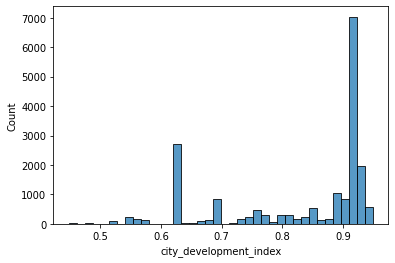

training_hours
NaN number 0


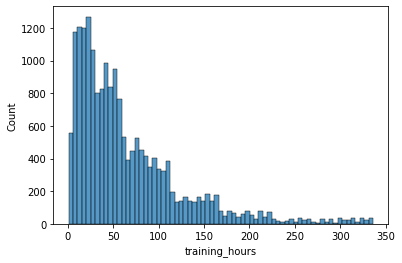

In [339]:
hist_number(X_hr_fill)

In [340]:
X_hr_fill[(X_hr_fill.city_development_index > 0.6) & (X_hr_fill.city_development_index < 0.64)].city.value_counts()

city_21     2702
city_129       3
Name: city, dtype: int64

In [341]:
X_hr_fill.training_hours[X_hr_fill.training_hours > 330].count()

34

не наблюдаю в числовых признаках выбросов, город с наименьшим индексом есть и это нормально, есть слишком часто встречающиеся индексы, однако это просто один город из которого много людей

в количестве учебных часов также не наблюдается выбросов

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


city – Frequency encoding, слишком много лейблов для onehot encoding, а frequency дает доп информацию о частоте города

gender – One-hot encoding

relevent_experience – One-hot encoding

enrolled_university – One-hot encoding

education_level – Label encoding

major_discipline – One-hot encoding

experience – Label encoding

company_size – Label encoding

company_type – One-hot encoding

last_new_job – Label encoding

In [376]:
def encode(X):
    X_encode = X.copy()
    
    one_hot = ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']
    freq = ['city']
    
    # education_level encode
    labels = {'Primary School': 0,
             'High School': 1, 
             'Graduate': 2, 
             'Masters': 3,
             'Phd': 4}
    X_encode.education_level = X_encode.education_level.map(lambda x: labels[x])
    
    # experience encode
    def convert_experience(x):
        if x == '<1':
            return 0
        elif x == '>20':
            return 21
        else:
            return int(x)
    X_encode.experience = X_encode.experience.map(convert_experience)
    
    # company_size encode
    labels = {'unknown': 0, 
              '<10': 1,
              '10/49': 2, 
              '50-99': 3,  
              '100-500': 4, 
              '500-999': 5,
              '1000-4999': 6,
              '5000-9999': 7, 
              '10000+': 8, 
             }
    X_encode.company_size = X_encode.company_size.map(lambda x: labels[x])
    
    # last_new_job encode
    def convert_last_new_job(x):
        if x == 'never':
            return 0
        elif x == '>4':
            return 5
        else:
            return int(x)
    X_encode.last_new_job = X_encode.last_new_job.map(convert_last_new_job)
    
    
    for c in one_hot:
        X_encode = pd.concat([X_encode, pd.get_dummies(X_encode[c], prefix=c)], axis=1)
        X_encode = X_encode.drop(c, axis=1)
    
    for c in freq:
        fe = X_encode.groupby(c).size() / X_encode.shape[0]
        X_encode[c + '_freq'] = X_encode[c].map(fe)
        X_encode = X_encode.drop(c, axis=1)
    
    return X_encode

In [377]:
X_hr_encode = encode(X_hr_fill)
X_hr_encode.sample(10)

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,gender_unknown,...,major_discipline_STEM,major_discipline_unknown,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_unknown,city_freq
4396,0.698,1,2,0,2,47,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0.002244
8295,0.887,1,4,1,4,12,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0.014354
13703,0.920,2,3,4,1,226,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0.227320
11198,0.647,2,12,0,3,133,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0.001409
2631,0.926,2,7,2,1,45,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0.069736
16135,0.897,3,6,0,1,29,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0.030588
15019,0.895,3,15,5,1,41,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0.004489
2386,0.939,3,15,6,4,12,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.010022
13510,0.624,2,1,0,1,126,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0.141038
14236,0.767,2,3,0,1,94,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0.006681


### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [456]:
def undersampling(X, y):
        
    remove_idx = np.random.choice(y[y == 0].index, y[y == 0].shape[0] - y[y == 1].shape[0], False)
    
    X_under = X.copy()
    y_under = y.copy()
    
    X_under = X_under.drop(remove_idx).reset_index(drop=True)
    y_under = y_under.drop(remove_idx).reset_index(drop=True)
    
    return X_under, y_under

def oversampling(X, y):
    X_over = X.copy()
    y_over = y.copy()
    
    upsamp_1 = y[y == 0].shape[0] // y[y == 1].shape[0]
    upsamp_2 = y[y == 0].shape[0] % y[y == 1].shape[0]
    
    up_idx = y_over[y_over == 1].index
    X_over = X_over.append([X_over.loc[up_idx]] * (upsamp_1 - 1), ignore_index=True)
    y_over = y_over.append([y_over[up_idx]] * (upsamp_1 - 1), ignore_index=True)
    
    up_idx = np.random.choice(y_over[y_over == 1].index, upsamp_2, False)
    X_over = X_over.append(X_over.loc[up_idx], ignore_index=True)
    y_over = y_over.append(y_over[up_idx], ignore_index=True)
    
    return X_over, y_over

In [457]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

In [459]:
y_hr_under.value_counts()

0.0    4777
1.0    4777
Name: target, dtype: int64

In [460]:
y_hr_over.value_counts()

0.0    14381
1.0    14381
Name: target, dtype: int64

In [462]:
X_hr_under.shape

(9554, 30)

In [463]:
X_hr_over.shape

(28762, 30)

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [464]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 167 kB 716 kB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 1.5 MB/s eta 0:00:01
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [465]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_hr_SMOTE, y_hr_SMOTE = smote.fit_resample(X_hr_encode, y_hr_fill)

In [466]:
y_hr_SMOTE.value_counts()

0.0    14381
1.0    14381
Name: target, dtype: int64

In [467]:
X_hr_SMOTE.shape

(28762, 30)

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

undersampling

city_development_index


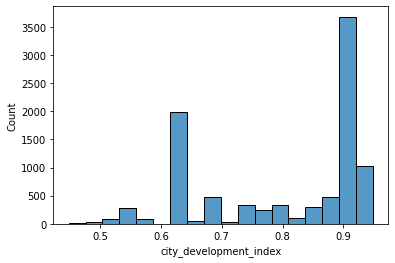

training_hours


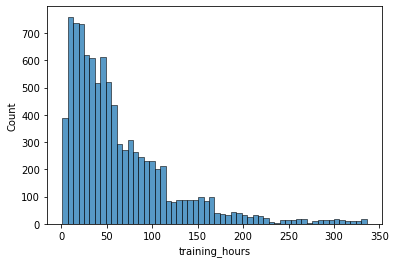

In [469]:
for col in ['city_development_index', 'training_hours']:
    print(col)
    sns.histplot(X_hr_under[col])
    plt.show()

oversampling

city_development_index


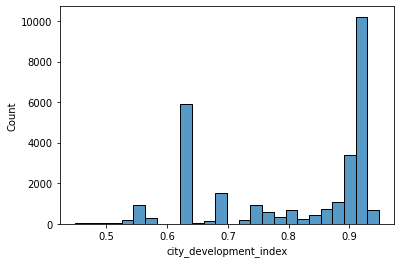

training_hours


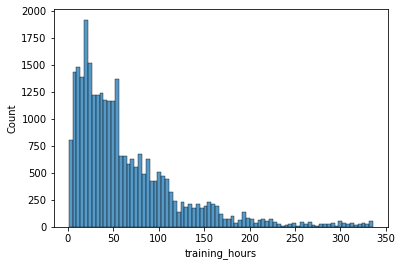

In [470]:
for col in ['city_development_index', 'training_hours']:
    print(col)
    sns.histplot(X_hr_over[col])
    plt.show()

city_development_index


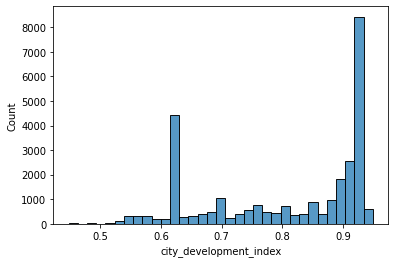

training_hours


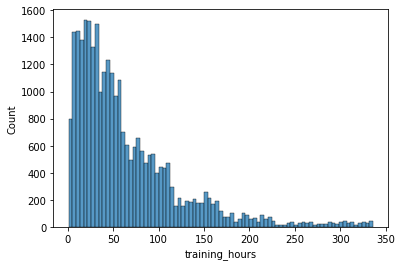

In [471]:
for col in ['city_development_index', 'training_hours']:
    print(col)
    sns.histplot(X_hr_SMOTE[col])
    plt.show()

визуально распределение поменялось не сильно